# Lesson-01 Assignment

### 基础理论部分


0. Can you come up out 3 sceneraies which use AI methods?  

Ans: automatic driving, face recognization, phone-customer service robot

1. How do we use Github; Why do we use Jupyter and Pycharm;  

Ans: We could upload our code and learn other people's code on Github. The Jupyter notebook works linearly and allows you to pass around scripts or analytic workflows to your coworkers but a full-fledged IDE like Pycharm gives you access to so much more and allows you to utilize Python to the fullest extent once you learn all the bells and whistles.Pycharm also gives you access to better code completion, find and replace, a variable explorer, and tools for project management/development. Plus, you can run Jupyter notebooks in Pycharm itself anyways. I mostly use Jupyter to quickly pilot a workflow or to share some code (it's a great pedagogical tool) but Pycharm to work on software projects that have multiple classes and parts.  

2. What's the Probability Model?  

Ans: A probability model is a mathematical representation of a random phenomenon. It is defined by its sample space, events within the sample space, and probabilities associated with each event.

3. Can you came up with some sceneraies at which we could use Probability Model?  

Ans: 
Planning Around the Weather :  
Nearly every day you use probability to plan around the weather. Meteorologists can't predict exactly what the weather will be, so they use tools and instruments to determine the likelihood that it will rain, snow or hail.  

Sports Strategies:  
Athletes and coaches use probability to determine the best sports strategies for games and competitions. A baseball coach evaluates a player's batting average when placing him in the lineup.  

Insurance Options:  
Probability plays an important role in analyzing insurance policies to determine which plans are best for you or your family and what deductible amounts you need. 


4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?  

Ans:Probability could help us find what's the next sequence in the sentence.Pattern matching is the act of checking a given sequence of tokens for the presence of the constituents of some pattern. In contrast to pattern recognition, the match usually has to be exact: "either it will or will not be a match.". Parsing means to make something understandable (by analysing its parts).For programming this means to convert information represented in one form into another form that's easier to work with. This is done by partially analysing the data, understanding its underlying structure (by making some assumptions based on what you're expecting to see), and then explicitly representing that structure in the code.

5. What's the Language Model;  

Ans:Model that assign probabilities to sequences of words are called language model.For short,it is the development of probabilistic models that are able to predict the next word in the sequence given the words that precede it. 

6. Can you came up with some sceneraies at which we could use Language Model?¶  

Ans:Spell correction, machine translation, Speech Recognition

7. What's the 1-gram language model;  

Ans:An 1-gram model is a type of probabilistic language model for predicting the next item in such a sequence in the form of a 0–order Markov model.

8. What's the disadvantages and advantages of 1-gram language model;  

Ans:advatage of 1-gram language model is fast an simple. The disadvantage of this model is the the probability of getting same words is much
larger than the probability of getting different words, for example: P(the the the the)>>P(I like ice cream)

9. What't the 2-gram models;  

Ans:Language model assigns probabilities to sentences and sequences of words, the n-gram. An n-gram is a sequence of N
n-gram words: a 2-gram (or bigram) is a two-word sequence of words like “please turn”,“turn your”, or ”your homework”.

### 编程实践部分

1. 设计你自己的句子生成器¶
如何生成句子是一个很经典的问题，从1940s开始，图灵提出机器智能的时候，就使用的是人类能不能流畅和计算机进行对话。和计算机对话的一个前提是，计算机能够生成语言。

计算机如何能生成语言是一个经典但是又很复杂的问题。 我们课程上为大家介绍的是一种基于规则（Rule Based）的生成方法。该方法虽然提出的时间早，但是现在依然在很多地方能够大显身手。值得说明的是，现在很多很实用的算法，都是很久之前提出的，例如，二分查找提出与1940s, Dijstra算法提出于1960s 等等。

在著名的电视剧，电影《西部世界》中，这些机器人们语言生成的方法就是使用的SyntaxTree生成语言的方法。

在这一部分，需要各位同学首先定义自己的语言。 大家可以先想一个应用场景，然后在这个场景下，定义语法。例如：

In [1]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""


请定义你自己的语法:

第一个语法：

In [2]:
import random
def create_grammar(grammar_str, split='=', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

第二个语法：

In [3]:
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

TODO: 然后，使用自己之前定义的generate函数，使用此函数生成句子。

In [4]:

generate(gram=create_grammar(host, split='='), target='host')

'你好我是8号,请问你要打猎吗？'

TODO: 然后，定义一个函数，generate_n，将generate扩展，使其能够生成n个句子:

In [5]:
def generate_n(times):
    for i in range(times):
        print (generate(gram=create_grammar(host, split='='), target='host'))



In [6]:
generate_n(30)

小朋友,您好我是9号,请问你要赌博吗？
你好我是862号,请问你要赌博吗？
你好我是92号,您需要打猎吗？
你好我是2号,请问你要打牌吗？
您好我是9号,您需要打猎吗？
先生,您好我是47号,请问你要打牌吗？
先生,您好我是869号,您需要打猎吗？
你好我是2号,您需要喝酒吗？
你好我是2号,请问你要打牌吗？
女士,你好我是41号,您需要赌博吗？
女士,你好我是9号,您需要打猎吗？
先生,你好我是8953号,请问你要赌博吗？
您好我是779555号,您需要打猎吗？
您好我是8号,请问你要喝酒吗？
女士,你好我是1号,请问你要打猎吗？
您好我是1号,请问你要赌博吗？
小朋友,您好我是61号,您需要喝酒吗？
您好我是3号,请问你要打牌吗？
先生,你好我是82号,您需要喝酒吗？
女士,你好我是7号,请问你要打牌吗？
你好我是254号,请问你要赌博吗？
你好我是78号,您需要喝酒吗？
你好我是16号,请问你要打猎吗？
您好我是12号,您需要打猎吗？
女士,您好我是4号,您需要赌博吗？
小朋友,你好我是831559号,请问你要赌博吗？
您好我是93号,请问你要赌博吗？
先生,您好我是6号,您需要赌博吗？
你好我是999号,您需要赌博吗？
您好我是884号,您需要赌博吗？



#### 2. 使用新数据源完成语言模型的训练¶
按照我们上文中定义的prob_2函数，我们更换一个文本数据源，获得新的Language Model:

下载文本数据集（你可以在以下数据集中任选一个，也可以两个都使用）  
可选数据集1，保险行业问询对话集： https://github.com/Computing-Intelligence/insuranceqa-corpus-zh/raw/release/corpus/pool/train.txt.gz  
可选数据集2：豆瓣评论数据集：https://github.com/Computing-Intelligence/datasource/raw/master/movie_comments.csv  
修改代码，获得新的2-gram语言模型  
进行文本清洗，获得所有的纯文本  
将这些文本进行切词  
送入之前定义的语言模型中，判断文本的合理程度

In [7]:
import pandas as pd
filename = '/Users/ywan3/Desktop/NLP/Lesson_1/movie_comments.csv'
content = pd.read_csv(filename,low_memory=False)
content.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [8]:
articles = content['comment'].tolist()

In [9]:
len(articles)

261497

In [10]:
import re

In [11]:
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [12]:
from collections import Counter

In [13]:
import jieba

In [14]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [15]:
len(articles_clean)

261497

In [16]:
with open('article_9k.txt', 'w',encoding='utf-8') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [17]:
def cut(string): return list(jieba.cut(string))

In [18]:
TOKEN = []

In [19]:
for i, line in enumerate((open('article_9k.txt','rb'))):
    if i % 100 == 0: print(i)
    
    
    
    if i > 100000: break    
    TOKEN += cut(line)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ywan3\AppData\Local\Temp\jieba.cache


0


Loading model cost 0.821 seconds.
Prefix dict has been built succesfully.


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [20]:
from functools import reduce
from operator import add, mul

In [21]:
words_count = Counter(TOKEN)
words_count.most_common(100)

[('的', 127398),
 ('\r\n', 100001),
 ('了', 44537),
 ('是', 29955),
 ('我', 21014),
 ('都', 15430),
 ('看', 14093),
 ('电影', 13545),
 ('也', 13437),
 ('很', 13356),
 ('和', 12586),
 ('在', 12181),
 ('不', 11864),
 ('有', 11599),
 ('就', 11161),
 ('人', 9400),
 ('好', 9284),
 ('啊', 8984),
 ('还', 7740),
 ('你', 7569),
 ('这', 7332),
 ('还是', 6989),
 ('一个', 6931),
 ('但', 6479),
 ('就是', 6013),
 ('没有', 5980),
 ('剧情', 5616),
 ('让', 5534),
 ('故事', 5508),
 ('太', 5195),
 ('喜欢', 5170),
 ('没', 4752),
 ('说', 4716),
 ('吧', 4669),
 ('给', 4664),
 ('又', 4627),
 ('不错', 4510),
 ('到', 4421),
 ('他', 4346),
 ('得', 4311),
 ('一部', 4225),
 ('上', 4214),
 ('这个', 4186),
 ('能', 4141),
 ('被', 4087),
 ('最后', 4081),
 ('什么', 4020),
 ('多', 4007),
 ('对', 3882),
 ('可以', 3762),
 ('不是', 3714),
 ('好看', 3709),
 ('最', 3690),
 ('觉得', 3646),
 ('片子', 3542),
 ('真的', 3509),
 ('要', 3452),
 ('导演', 3372),
 ('拍', 3223),
 ('但是', 3204),
 ('自己', 3183),
 ('去', 3167),
 ('感觉', 3161),
 ('想', 3123),
 ('这部', 3114),
 ('中', 3071),
 ('与', 3050),
 ('里', 3037),
 ('把

In [22]:
frequiences = [f for w, f in words_count.most_common(100)]
x = [i for i in range(100)]

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

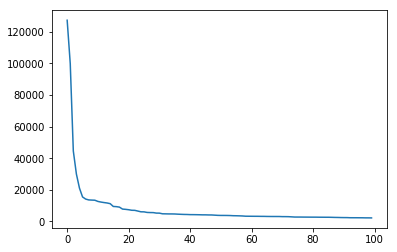

In [24]:
plt.plot(x, frequiences)

In [25]:
import numpy as np

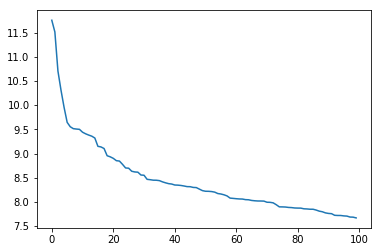

In [26]:
plt.plot(x, np.log(frequiences))

In [27]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [28]:
TOKEN = [str(t) for t in TOKEN]
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
words_count_2 = Counter(TOKEN_2_GRAM)

In [29]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [30]:
example_grammar= create_grammar(host)
example_grammar

{'host': [['寒暄', '报数', '询问', '业务相关', '结尾']],
 '报数': [['我是', '数字', '号', ',']],
 '数字': [['单个数字'], ['数字', '单个数字']],
 '单个数字': [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']],
 '寒暄': [['称谓', '打招呼'], ['打招呼']],
 '称谓': [['人称', ',']],
 '人称': [['先生'], ['女士'], ['小朋友']],
 '打招呼': [['你好'], ['您好']],
 '询问': [['请问你要'], ['您需要']],
 '业务相关': [['玩玩', '具体业务']],
 '玩玩': [['null']],
 '具体业务': [['喝酒'], ['打牌'], ['打猎'], ['赌博']],
 '结尾': [['吗？']]}

In [31]:
def get_probability(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [33]:
for sen in [generate(gram=example_grammar, target='host') for i in range(10)]:
    print('sentence: {} with Prob: {}'.format(sen, get_probability(sen)))

sentence: 你好我是3号,您需要赌博吗？ with Prob: 6.253511018350026e-59
sentence: 你好我是54352号,您需要赌博吗？ with Prob: 8.12144288097406e-61
sentence: 女士,您好我是1号,您需要打牌吗？ with Prob: 2.253621733418161e-71
sentence: 女士,你好我是4号,请问你要喝酒吗？ with Prob: 6.851924798241667e-77
sentence: 先生,你好我是6号,您需要打猎吗？ with Prob: 2.1463064127792014e-73
sentence: 您好我是25号,请问你要喝酒吗？ with Prob: 2.88078965914661e-65
sentence: 您好我是3号,您需要赌博吗？ with Prob: 6.253511018350026e-59
sentence: 你好我是86号,您需要赌博吗？ with Prob: 8.12144288097406e-61
sentence: 你好我是4号,请问你要赌博吗？ with Prob: 2.5927106932319497e-64
sentence: 你好我是548号,您需要打猎吗？ with Prob: 8.12144288097406e-61


In [34]:
need_compared = [
    "今天晚上请你喝酒，女士一起吃日料 我们一起打架",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去赌博 今晚火锅去吃我",
    "孜然奶茶来一杯 养乐多娃哈哈一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probability(s1), get_probability(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probability {}'.format(s1, p1))
    print('-'*4 + ' {} with probability {}'.format(s2, p2))

我们一起打架 is more possible
---- 今天晚上请你喝酒，女士一起吃日料 with probability 1.564760844044844e-54
---- 我们一起打架 with probability 1.2156718508620709e-11
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probability 3.158141197992687e-28
---- 真是一只好看的小猫 with probability 1.0238846407383526e-22
今晚我去赌博 is more possible
---- 今晚我去赌博 with probability 1.4265174628988854e-17
---- 今晚火锅去吃我 with probability 1.676209507347917e-24
养乐多娃哈哈一杯 is more possible
---- 孜然奶茶来一杯 with probability 1.3585880599037004e-19
---- 养乐多娃哈哈一杯 with probability 2.6427648931784153e-13


#### 3. 获得最优质的的语言¶
当我们能够生成随机的语言并且能判断之后，我们就可以生成更加合理的语言了。请定义 generate_best 函数，该函数输入一个语法 + 语言模型，能够生成n个句子，并能选择一个最合理的句子:

In [94]:
### 这道题用的zip()后总是显示float uniterable,不知道怎么解决了。。
   


                   


